In [2]:
import re
import numpy as np
import pandas as pd
import os, json
import torch
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px

In [3]:
import torch

if torch.cuda.is_available():    

    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [5]:
df= pd.read_csv('C:/Users/Atharva Pathak/OneDrive/Desktop/NLP/vaccination_all_tweets.csv')
df.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

In [8]:
df.drop(columns=['id'], inplace=True)

In [9]:
df = df.drop_duplicates('text')
print(df.shape)

(88860, 15)


In [10]:
def clean_tweet_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    return text

# the following line makes use of an apply function-- it will call clean_tweet_text on every element in the 'text' column
df['text'].transform(clean_tweet_text)
df.head()

user_name              user_location  \
0            Rachel Roh  La Crescenta-Montrose, CA   
1           Albert Fong          San Francisco, CA   
2              eli🇱🇹🇪🇺👌                   Your Bed   
3         Charles Adler     Vancouver, BC - Canada   
4  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

In [11]:
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

user_name              user_location  \
0            Rachel Roh  La Crescenta-Montrose, CA   
1           Albert Fong          San Francisco, CA   
2              eli🇱🇹🇪🇺👌                   Your Bed   
3         Charles Adler     Vancouver, BC - Canada   
4  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified        date  \
0             405          1692             3247          False  2020-12-20   
1             834           666              178          False  2020-12-13   
2              10            88              155          False  2020-12-12   
3           49165          3933            21853           True  2020-12-12   
4             152           580             1473          False  2020-12-12   

                                                text  \
0  Same folks said daikon paste could treat a cyt...   
1  While the world has been on the wrong side of ...   
2  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  Facts are immutable, Senator, even when you're...   
4  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

In [12]:
df.describe()

user_followers   user_friends  user_favourites      retweets  \
count    8.886000e+04   88860.000000     8.886000e+04  88860.000000   
mean     1.063234e+05    1234.829316     1.544338e+04      3.268310   
std      8.558605e+05    5657.627959     4.485591e+04     63.600889   
min      0.000000e+00       0.000000     0.000000e+00      0.000000   
25%      1.010000e+02     135.000000     3.160000e+02      0.000000   
50%      5.060000e+02     378.000000     2.152000e+03      0.000000   
75%      2.449250e+03    1083.000000     1.105825e+04      1.000000   
max      1.556950e+07  516578.000000     1.221784e+06  11288.000000   

          favorites  
count  88860.000000  
mean      14.309228  
std      216.335730  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        3.000000  
max    25724.000000

<AxesSubplot:>

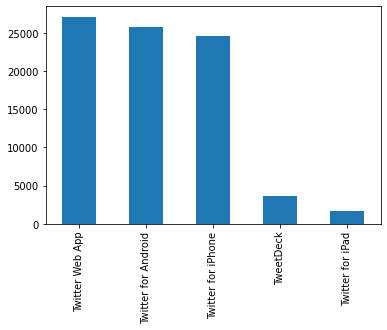

In [13]:
df['source'].value_counts().head(n=5).plot.bar()

<AxesSubplot:>

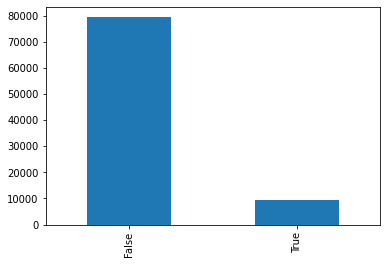

In [14]:
df['user_verified'].value_counts().head(n=10).plot.bar()

In [15]:
df[df['user_verified'] == True].head()

user_name           user_location  \
3         Charles Adler  Vancouver, BC - Canada   
7   Dr.Krutika Kuppalli                     NaN   
12                 WION                   India   
13  Dr.Krutika Kuppalli                     NaN   
15            City A.M.         London, England   

                                     user_description         user_created  \
3   Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
7   ID, Global Health, VHF, Pandemic Prep, Emergin...  2019-03-25 04:14:29   
12  #WION: World Is One | Welcome to India’s first...  2016-03-21 03:44:54   
13  ID, Global Health, VHF, Pandemic Prep, Emergin...  2019-03-25 04:14:29   
15  London's business newspaper - News, Opinion, a...  2009-06-09 13:53:06   

    user_followers  user_friends  user_favourites  user_verified        date  \
3            49165          3933            21853           True  2020-12-12   
7            21924           593             7815           True  2020-12-12   
12          292510            91             7531           True  2020-12-12   
13           21924           593             7815           True  2020-12-12   
15           66224           603              771           True  2020-12-12   

                                                 text  \
3   Facts are immutable, Senator, even when you're...   
7   There have not been many bright days in 2020 b...   
12  The agency also released new information for h...   
13  For all the women and healthcare providers who...   
15  Trump announces #vaccine rollout 'in less than...   

                           hashtags              source  retweets  favorites  \
3                               NaN     Twitter Web App       446       2129   
7   ['BidenHarris', 'Election2020']  Twitter for iPhone         2         22   
12                              NaN           TweetDeck         0         18   
13               ['PfizerBioNTech']  Twitter for iPhone        48         82   
15                      ['vaccine']  Twitter for iPhone         0          1   

    is_retweet  
3        False  
7        False  
12       False  
13       False  
15       False

In [16]:
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='retweets', ascending=False)[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)


text  \
68358        RDIF, Laboratorios Richmond launched production of #SputnikV in Argentina, the first country in Latin America to ma… https://t.co/oEMaUwVR92   
46053                  Why we need Two Doses of mRNA Vaccine 💉 #vaccines #COVID19 #Pfizer #moderna #VaccinesSaveLives #vaccinated https://t.co/RFRmPAyubD   
54674        We completely reject the false and malicious reporting by @CNBCTV18News on COVAXIN® supplies to international marke… https://t.co/OXgKYg2YLL   
66822        ICMR study shows #COVAXIN neutralises against multiple variants of SARS-CoV-2 and effectively neutralises the doubl… https://t.co/0IYwr0KymJ   
68306             Argentine Health Minister @carlavizzotti and Presidential Adviser @cecilianicolini celebrate the production of… https://t.co/E9cPPA5Twf   
76306  #Argentina's actor breaks into a live TV to show his #SputnikV vaccination certificate &amp; express his gratitude. \n\nT… https://t.co/N1NwjkD83y   
17118                                          Got my jab. For the curious, it was #Covaxin. \n\nFelt secure, will travel safely. https://t.co/8PL7PZMEsf   
53045            I see it’s going around with signature cropped....so here is the original:) #covid 19 #vaccine #pfizer #moderna… https://t.co/eoqT74V78A   
75232          It’s 72 hours since @BharatBiotech announced that it will transfer production details to whoever wants to produce… https://t.co/ixrqS87R6X   
7126     New research published in Microbiology &amp; Infectious Diseases, immunologist J. Bart Classen warns #mRNA technology u… https://t.co/OWUTf5ShHO   

             date             user_name              user_location  \
68358  2021-04-20             Sputnik V            Moscow, Russia    
46053  2021-04-01        hotvickkrishna              Manhattan, NY   
54674  2021-04-08         BharatBiotech           Hyderabad, India   
66822  2021-04-21                  ICMR                  New Delhi   
68306  2021-04-20             Sputnik V            Moscow, Russia    
76306  2021-05-19             Sputnik V            Moscow, Russia    
17118  2021-03-01     Dr. S. Jaishankar           New Delhi, India   
53045  2021-04-12             dawnymock  Fredericton New Brunswick   
75232  2021-05-17          B L Santhosh           New Delhi, India   
7126   2021-02-10  Robert F. Kennedy Jr     Los Angles, California   

                                                                              hashtags  \
68358                                                                     ['SputnikV']   
46053  ['vaccines', 'COVID19', 'Pfizer', 'moderna', 'VaccinesSaveLives', 'vaccinated']   
54674                                                                              NaN   
66822                                                                      ['COVAXIN']   
68306                                                                              NaN   
76306                                                        ['Argentina', 'SputnikV']   
17118                                                                      ['Covaxin']   
53045                                        ['covid', 'vaccine', 'pfizer', 'moderna']   
75232                                                                              NaN   
7126                                                                          ['mRNA']   

       favorites  retweets  
68358      25724     11288  
46053      19622      7695  
54674      15944      6018  
66822      11995      4851  
68306      15148      4105  
76306      14412      2550  
17118      22815      2360  
53045      10175      2299  
75232       7030      2294  
7126        3090      2247

In [17]:
df.sort_values(by=['date', 'favorites'], ascending=[True, False])[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

text  \
3      Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4   
13                 For all the women and healthcare providers who have been asking about the safety of the #PfizerBioNTech… https://t.co/ow0Pglkwte   
35                              An immigrant Muslim couple find the COVID-19 Vaccine. \n\n#CovidVaccine #PfizerBioNTech #Pfizervaccine #PfizerProud   
295    New PODCAST: Vaccinating Our Way Out of the Pandemic\n@larrybrilliant, @PeterHotez &amp; @RaySuarezNews discuss the… https://t.co/ZETygVRafP   
296    Eric Shawn: The vaccine is here...in record time! https://t.co/Vu2awzLgjM thanks @EricShawnTV @ArthelNeville for al… https://t.co/qUsLDXGsAX   
7       There have not been many bright days in 2020 but here are some of the best \n1. #BidenHarris winning #Election2020… https://t.co/77u4f8XXfx   
293                 #UnitedStates : The Federal Aviation Administration (FAA) said Saturday it had approved the use of the… https://t.co/xvwUEvZZk2   
12     The agency also released new information for health care providers and for patients as the US shipped millions of d… https://t.co/sG6BtD7jD9   
25   No.1 of 2 done.\n\n#ThankYouNHS @NHSuk @MHRAgovuk and #PfizerBioNTech @pfizer for making the #CovidVaccine dream poss… https://t.co/3KvJ7UP432   
17           Coronavirus: Iran reports 8,201 new cases, 221 deaths in the last 24 hours #Iran #coronavirus #PfizerBioNTech… https://t.co/mwDNAdmb7F   

           date                    user_name             user_location  \
3    2020-12-12                Charles Adler    Vancouver, BC - Canada   
13   2020-12-12          Dr.Krutika Kuppalli                       NaN   
35   2020-12-12  Shahjhan Malik | #WearAMask  Nottinghamshire, England   
295  2020-12-12                World Affairs         San Francisco, CA   
296  2020-12-12               Marc Siegel MD                       NaN   
7    2020-12-12          Dr.Krutika Kuppalli                       NaN   
293  2020-12-12                      DD News          New Delhi, India   
12   2020-12-12                         WION                     India   
25   2020-12-12              Devan Surendran       Nottingham, England   
17   2020-12-12                        ILKHA                   Türkiye   

                                                               hashtags  \
3                                                                   NaN   
13                                                   ['PfizerBioNTech']   
35   ['CovidVaccine', 'PfizerBioNTech', 'Pfizervaccine', 'PfizerProud']   
295                                                                 NaN   
296                                                                 NaN   
7                                       ['BidenHarris', 'Election2020']   
293                                                    ['UnitedStates']   
12                                                                  NaN   
25                    ['ThankYouNHS', 'PfizerBioNTech', 'CovidVaccine']   
17                            ['Iran', 'coronavirus', 'PfizerBioNTech']   

     favorites  retweets  
3         2129       446  
13          82        48  
35          37         2  
295         34        10  
296         32         8  
7           22         2  
293         21         4  
12          18         0  
25          10         1  
17           5         3

In [18]:
testimonial = TextBlob("So excited to get my vaccine!")
print(testimonial.sentiment)
testimonial = TextBlob("Is the vaccine painful?")
print(testimonial.sentiment)
testimonial = TextBlob("The Pfizer vaccine is now FDA approved")
print(testimonial.sentiment)

Sentiment(polarity=0.46875, subjectivity=0.75)
Sentiment(polarity=-0.7, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)


In [19]:
testimonial = TextBlob("I tested positive for COVID-19")
print(testimonial.sentiment)


Sentiment(polarity=0.22727272727272727, subjectivity=0.5454545454545454)


In [20]:
text = """
Today Texas surpassed 8 million vaccinations. It was just 4 days ago that we passed 7 million.

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.

Hospitalizations went down again also.

Great job Texans!

Vaccines are always voluntary, never forced.
"""
blob = TextBlob(text)

In [24]:
print("Tags")
print(blob.tags, end="\n\n")

print("Noun Phrases")
print(blob.noun_phrases, end="\n\n")

print("Words")
print(blob.words, end="\n\n")

print("Sentences")
print(blob.sentences, end="\n\n")

Tags
[('Today', 'NN'), ('Texas', 'NNP'), ('surpassed', 'VBD'), ('8', 'CD'), ('million', 'CD'), ('vaccinations', 'NNS'), ('It', 'PRP'), ('was', 'VBD'), ('just', 'RB'), ('4', 'CD'), ('days', 'NNS'), ('ago', 'RB'), ('that', 'IN'), ('we', 'PRP'), ('passed', 'VBD'), ('7', 'CD'), ('million', 'CD'), ('The', 'DT'), ('positivity', 'NN'), ('rate', 'NN'), ('dropped', 'VBD'), ('even', 'RB'), ('lower', 'JJR'), ('to', 'TO'), ('6.08', 'CD'), ('%', 'NN'), ('the', 'DT'), ('lowest', 'JJS'), ('since', 'IN'), ('May', 'NNP'), ('31st', 'CD'), ('Hospitalizations', 'NNS'), ('went', 'VBD'), ('down', 'RB'), ('again', 'RB'), ('also', 'RB'), ('Great', 'NNP'), ('job', 'NN'), ('Texans', 'NNPS'), ('Vaccines', 'NNS'), ('are', 'VBP'), ('always', 'RB'), ('voluntary', 'JJ'), ('never', 'RB'), ('forced', 'VBN')]

Noun Phrases
['texas', 'positivity rate', 'may', 'hospitalizations', 'great job', 'vaccines']

Words
['Today', 'Texas', 'surpassed', '8', 'million', 'vaccinations', 'It', 'was', 'just', '4', 'days', 'ago', 'that'

In [25]:
for sentence in blob.sentences:
    print(sentence)
    print("polarity:", sentence.sentiment.polarity)
    print("subjectivity:", sentence.sentiment.subjectivity)
    print()


Today Texas surpassed 8 million vaccinations.
polarity: 0.0
subjectivity: 0.0

It was just 4 days ago that we passed 7 million.
polarity: 0.0
subjectivity: 0.0

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.
polarity: 0.0
subjectivity: 0.0

Hospitalizations went down again also.
polarity: -0.15555555555555559
subjectivity: 0.2888888888888889

Great job Texans!
polarity: 1.0
subjectivity: 0.75

Vaccines are always voluntary, never forced.
polarity: 0.15000000000000002
subjectivity: 0.2



In [26]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()

user_name              user_location  \
0            Rachel Roh  La Crescenta-Montrose, CA   
1           Albert Fong          San Francisco, CA   
2              eli🇱🇹🇪🇺👌                   Your Bed   
3         Charles Adler     Vancouver, BC - Canada   
4  Citizen News Channel                        NaN   

                                                                                                                                    user_description  \
0                                   Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻   
1            Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.   
2                                                                                                                                     heil, hydra 🖐☺   
3  Hosting "CharlesAdlerTonight" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca   
4                Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views   

          user_created  user_followers  user_friends  user_favourites  \
0  2009-04-08 17:52:46             405          1692             3247   
1  2009-09-21 15:27:30             834           666              178   
2  2020-06-25 23:30:28              10            88              155   
3  2008-09-10 11:28:53           49165          3933            21853   
4  2020-04-23 17:58:42             152           580             1473   

   user_verified        date  \
0          False  2020-12-20   
1          False  2020-12-13   
2          False  2020-12-12   
3           True  2020-12-12   
4          False  2020-12-12   

                                                                                                                                           text  \
0                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF   
1  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm   
2  #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P   
3  Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4   
4       Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq   

                                                                              hashtags  \
0                                                                   ['PfizerBioNTech']   
1                                                                                  NaN   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']   
3                                                                                  NaN   
4                                       ['whereareallthesickpeople', 'PfizerBioNTech']   

                source  retweets  favorites  is_retweet  polarity  \
0  Twitter for Android         0          0       False      0.00   
1      Twitter Web App         1          1       False     -0.50   
2  Twitter for Android         0          0       False      0.00   
3      Twitter Web App       446       2129       False     -0.05   
4   Twitter for iPhone         0          0       False      0.00   

   subjectivity  
0      0.125000  
1      0.900000  
2      0.033333  
3      0.550000  
4      0.000000

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

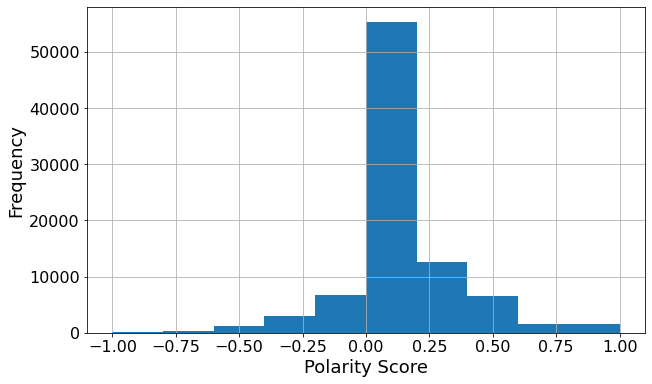

In [27]:
fig = plt.figure(figsize=(10, 6))
df['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

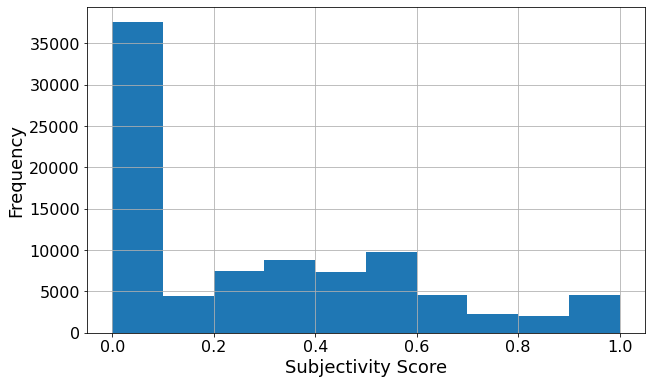

In [28]:
fig = plt.figure(figsize=(10, 6))
df['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [29]:
df.sort_values(by='polarity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)


text  \
0         Hopefully protected from this horrible virus and protecting those around me 💉 @StockportNHS we can do this!!… https://t.co/M0PJoSCQtC   
1  @MjlLeghari That is pathetic, they should have managed it through online appointments like chughtai, they did a muc… https://t.co/JaX8ldOury   
2  I want to get the vaccine to protect myself and family from this evil virus but this statement has made me sh*t mys… https://t.co/HHcIudjnQM   
3              Virgin forest kumrat kpk\nYou know how we collect data, \nWe have walk 40 km thats was worst experience… https://t.co/6klomo2tEB   
4      Beware!\n#terrible\n#accountability\n#CSK #dhoni #airasia #cheapflights \n#scam #Cheat #IPL2021 #india #Covaxin… https://t.co/20KPyeiB2P   
5  @PritishNandy Vicious people like you are treating the #Indian vaccines like #Covishield and #Covaxin with derision… https://t.co/j18FUfeDfv   
6  Terrifying account of taking the #Oxford  / #OxfordAstraZeneca / #AstraZenaca vack-seeen. \nThink I’ll just take my… https://t.co/cClLy4u3ds   
7                          Day 2 after getting a shot of #Moderna - Fever 37.5°, terrible pain in arm, feeling unwell… but hey hey #IGotTheShot   
8  @abc7newsbayarea Of course send the FAULTY #vaccines to your neighbors...Why not the #JnJ #Moderna or #PfizerVaccine ?!? Pathetic Po💩. 😉🤣😂😂😂   
9                                        Has anyone noticed a terrible taste in their mouth after the Moderna vaccine? #vaccine #Covid #Moderna   

   polarity  subjectivity  
0      -1.0           1.0  
1      -1.0           1.0  
2      -1.0           1.0  
3      -1.0           1.0  
4      -1.0           1.0  
5      -1.0           1.0  
6      -1.0           1.0  
7      -1.0           1.0  
8      -1.0           1.0  
9      -1.0           1.0

In [30]:
df.sort_values(by='polarity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  \
0             Best Islamic Laws\n#MondayMotivation\n#CGBudget2021\n#Covaxin\n#FastForNation\n#HBDMKStalin\n#ayeshaarifkhan… https://t.co/1QU0hHyLdx   
1     Got #Covaxin 1st shot today.. 28 days to fully vaccinated.. Arm hurts like hell.. \nBest time to make use of @VMware… https://t.co/Y9eNjjBw4O   
2   @PTI_News Team PTI\nClarify use #SocialMedia\nThe best vaccine for Indian #COVID19 #SputnikV\n50 countries are using S… https://t.co/wtnDsjh4cS   
3  The UK 'mix and match' study (COM-CoV trial) to include #Moderna &amp; #Novavax vaccines! Really great news!\nThe study… https://t.co/IBkbmCruX7   
4                                                                     Vaccinated! #moderna #firstshot @MaastrichtUMC great! https://t.co/VYmZ4GCPS3   
5   @DalitTalks Dr /Sonia Madam\nClarify use #SocialMedia\nThe best vaccine for Indian #COVID19 #SputnikV\n50 countries ar… https://t.co/D4F9g9950V   
6   @DalitTalks Dr /Sonia Madam\nClarify use #SocialMedia\nThe best vaccine for Indian #COVID19 #SputnikV\n50 countries ar… https://t.co/jbfDGXPjym   
7    Congratulations to @BharatBiotech for achieving Excellent Results in Phase 3 of #Covaxin .\n\n#AatmanirbharBharat \n#AatmanirbharBharatVaccine   
8   @DalitTalks @congress_ Dr /Sonia Madam\nClarify use #SocialMedia\nThe best vaccine for Indian #COVID19 #SputnikV\n50 c… https://t.co/wMdhUcCm3e   
9  Unsure which #COVID19 vaccine is best? The answer is all of them! While the two-dose #Moderna &amp; #Pfizer were approv… https://t.co/nLrmDVooFU   

   polarity  subjectivity  
0       1.0          0.30  
1       1.0          0.30  
2       1.0          0.30  
3       1.0          0.75  
4       1.0          0.75  
5       1.0          0.30  
6       1.0          0.30  
7       1.0          1.00  
8       1.0          0.30  
9       1.0          0.30

In [31]:
df.sort_values(by='subjectivity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  \
0                                             RDIF, Panacea Biotec to start Sputnik V production in India \n\n#SputnikV \n\nhttps://t.co/YN8wtHUdsK   
1    Tamil Nadu Chief Minister EPS was administered #Covaxin today at Omandurar govt hospital in Chennai.\n\n#CovidVaccine… https://t.co/mqsjtdsgBp   
2      Find out who was the #COVIDIOT of the day! With concerns over variant strains and @BharatBiotech beginning the phas… https://t.co/VKOqILVV4C   
3  with *0.5 ml dose of Oxford AstraZeneca vaccine Covishield* intramuscularly\n\n#CovidVaccine\n#FarmersProtest\n#Covaxin… https://t.co/utPCb9o9XM   
4                                                                               #SputnikV has been approved for emergency use in India. \n#COVIDー19   
5      Tamil Nadu CM Edappadi Palanisamy took #Covaxin vaccine against #COVID19 in Chennai's Omandhurar government General… https://t.co/D9NA1AANhB   
6        Should India stop exporting vaccines in view of the shortage within the country?\n\n#IndiaFightsCorona #COVIDIOTS… https://t.co/BKPTtN8A4e   
7                                     CDSCO expert panel recommends moving Covaxin out of 'clinical trial mode'\n#Covaxin \nhttps://t.co/3ug8ZeEbRK   
8                                                                                                 Can't help it 😂 #SputnikV https://t.co/c9btV6tbVR   
9     #SputnikV has been approved for emergency use in India after bridge study by Reddy labs \nSputnik seems to have deal… https://t.co/jI5X3KjtT9   

   polarity  subjectivity  
0       0.0           0.0  
1       0.0           0.0  
2       0.0           0.0  
3       0.0           0.0  
4       0.0           0.0  
5       0.0           0.0  
6       0.0           0.0  
7       0.0           0.0  
8       0.0           0.0  
9       0.0           0.0

In [32]:
df.sort_values(by='subjectivity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  \
0                         Finally achieved eligibility in my home state &amp; now I’m VACCINATED 🙌🏻 #JNJ #Pfizer #Moderna https://t.co/PcqWeOINwK   
1           @Sarahluvshkey77 Done. 2 #Moderna Shots. I still wear a mask snd be careful but I am #relieved #VaccineRollout #vaccinate #California   
2      Coronavirus worldwide: The number of confirmed cases reaches 163,800,863 #CoronavirusPandemic #SputnikV #lockdown… https://t.co/9VHBhNcaM5   
3  My troll: \n1️⃣Why #Vietnam has lowest vaccination rate? \nVaccines are for Emergency Use only. VN is not in Emergenc… https://t.co/skLPidbowQ   
4                                              #Coimbatore \n#VaccinationUpdate #CoronaVaccine \nonly #Covaxin \n#COVID19 https://t.co/ZzpLGMKC8r   
5                   @business Wow #VaccineWars hots up but I guess they won’t want the #OxfordAstraZeneca vaccines?\n\nSounds a bit Stalinist too   
6    Video about inactivated vaccine #Covaxin is by Bharat Biotech project lead.  He has a nice way of expressing himsel… https://t.co/3CVAlr7m5y   
7      Biocon Chief takes light-hearted jibe at COVID vaccination situation in India #Covid19Vaccine #covaxin #covishied… https://t.co/1TKeZL6UjW   
8             Is IPL really necessary when our country is going through a crisis? Please share your thoughts \n\n#crisis… https://t.co/Qzjx4mEw2Y   
9    #SputnikV the only vaccine in the world which uses 2 diff vectors of adenoviruses (Ad26 | Ad5) in each vaccine shot… https://t.co/EcTTsAgcAJ   

   polarity  subjectivity  
0       0.0           1.0  
1      -0.1           1.0  
2       0.4           1.0  
3       0.0           1.0  
4       0.0           1.0  
5       0.1           1.0  
6       0.6           1.0  
7       0.5           1.0  
8       0.0           1.0  
9       0.0           1.0

In [33]:
timeline = df.groupby(['date']).count().reset_index()
timeline['count'] = timeline['text']
timeline = timeline[['date', 'count']]
fig = px.bar(timeline, x='date', y='count', labels={'date': 'Date', 'count': 'Tweet Count'})
fig.show()

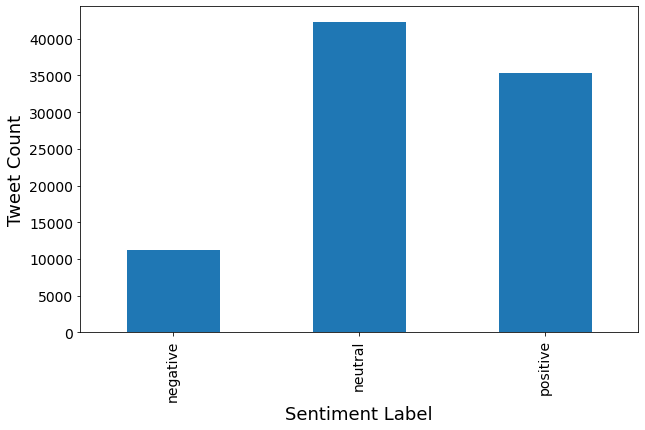

<Figure size 432x288 with 0 Axes>

In [34]:
criteria = [df['polarity'].between(-1, -0.01), df['polarity'].between(-0.01, 0.01), df['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
df['sentiment'] = np.select(criteria, values, 0)

# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()

In [35]:
timeline = df.groupby(['date']).agg(np.nanmean).reset_index()
timeline['count'] = df.groupby(['date']).count().reset_index()['retweets']
timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
timeline["polarity"] = timeline["polarity"].astype(float)
timeline["subjectivity"] = timeline["subjectivity"].astype(float)
timeline

date  count  polarity  retweets  favorites  subjectivity
0    2020-12-12     63  0.067223  8.650794  38.793651      0.259678
1    2020-12-13     98  0.105537  1.673469   7.306122      0.273242
2    2020-12-14    137  0.113316  3.284672  19.065693      0.275353
3    2020-12-15    150  0.117846  1.333333  10.106667      0.309868
4    2020-12-16    144  0.110607  1.409722   7.909722      0.296451
..          ...    ...       ...       ...        ...           ...
147  2021-05-28   1214  0.079589  3.168863  13.297364      0.245997
148  2021-05-29   1022  0.089904  2.173190   9.818982      0.271144
149  2021-05-30    683  0.091518  1.872621   9.705710      0.255991
150  2021-05-31    887  0.088304  1.519729   6.234498      0.255003
151  2021-06-01    559  0.088412  1.948122  11.125224      0.228031

[152 rows x 6 columns]

In [36]:
timeline.sort_values(by='polarity', ascending=False)

date  count  polarity  retweets  favorites  subjectivity
31   2021-01-12    106  0.194071  0.735849   6.716981      0.319507
12   2020-12-24    114  0.184444  2.570175  14.043860      0.340104
11   2020-12-23    123  0.177668  2.065041  11.365854      0.299824
47   2021-01-28     80  0.172677  0.850000   3.950000      0.359007
24   2021-01-05    111  0.166172  1.324324  10.324324      0.298039
..          ...    ...       ...       ...        ...           ...
85   2021-03-07    387  0.066453  1.514212   5.297158      0.295954
124  2021-04-15   1449  0.063951  3.094548  11.332643      0.268890
49   2021-01-30     73  0.062456  1.273973   9.356164      0.355072
37   2021-01-18     66  0.060610  2.393939   6.818182      0.323577
35   2021-01-16    129  0.055987  6.868217  13.062016      0.275396

[152 rows x 6 columns]

In [37]:
df[df['date'].astype(str) == '2021-01-12'][['user_location', 'date', 'text', 'hashtags', 'polarity', 'subjectivity', 'sentiment']]


user_location        date  \
2416                Northern Ireland  2021-01-12   
2530                         Britain  2021-01-12   
2531             Nottingham, England  2021-01-12   
2952  Ragbag Of Reviews And Insights  2021-01-12   
3050           Burgersfort & Tembisa  2021-01-12   
...                              ...         ...   
3314                   Edinburgh, UK  2021-01-12   
3315                         Greece   2021-01-12   
3316              Liverpool, England  2021-01-12   
3317                      London, UK  2021-01-12   
3318                             NaN  2021-01-12   

                                                                                                                                                text  \
2416                                         Delighted to receive my second vaccine today 👏🏻 #PfizerBioNTech #COVID19Vaccine https://t.co/QQOAwTG8tn   
2530             Yes, extraordinary, but not the way you’re thinking! #lockdown #vaccine #PfizerVaccine #PfizerCovidVaccine… https://t.co/xPPAxKxLvy   
2531   Had my COVID-19 vaccine on Friday 💉 and experienced most of the side effects #COVIDVaccination #PfizerBioNTech \n- h… https://t.co/8zGRzftQWM   
2952                #EU Plans To Purchase 300-million More #Covid19 Vaccines https://t.co/E6CxrV4yHA #covidvaccines #Pfizer… https://t.co/AKQ3vS8Dgi   
3050    Did you know that most of these Covid19 Vaccine Criticism are coming from Influencers who are hoping to get paid to… https://t.co/M70BCjB66S   
...                                                                                                                                              ...   
3314        Can you guess which US state made vaccination numbers available? \n\nhttps://t.co/XRsfG5KDNL\n\n#vaccinetracker… https://t.co/hojSzp5tGi   
3315   #Greece: #COVID19 vaccines for 15.4 million people\n#PfizerBioNTech: 427,050 January, 362,700 February, 558,675 Marc… https://t.co/k1Bz4gl5Jd   
3316  Very grateful to have received both doses of the #PfizerBioNTech #COVID19Vaccine \n\nThe team at #PictonPCN were amaz… https://t.co/BNZBL1BgYL   
3317    Of course i took a (shitty) vid but it was just like the normal flu jab. Felt tired for about 10 mins after the inj… https://t.co/daasMqXmkh   
3318                        First vaccine for COVID-19 yesterday.\nAs a front line worker I am very thankful. #nhs #COVIDVaccination #PfizerBioNTech   

                                                            hashtags  \
2416                            ['PfizerBioNTech', 'COVID19Vaccine']   
2530  ['lockdown', 'vaccine', 'PfizerVaccine', 'PfizerCovidVaccine']   
2531                          ['COVIDVaccination', 'PfizerBioNTech']   
2952                    ['EU', 'Covid19', 'covidvaccines', 'Pfizer']   
3050                                                             NaN   
...                                                              ...   
3314                                              ['vaccinetracker']   
3315                         ['Greece', 'COVID19', 'PfizerBioNTech']   
3316               ['PfizerBioNTech', 'COVID19Vaccine', 'PictonPCN']   
3317                                                             NaN   
3318                   ['nhs', 'COVIDVaccination', 'PfizerBioNTech']   

      polarity  subjectivity sentiment  
2416  0.350000      0.350000  positive  
2530  0.416667      1.000000  positive  
2531  0.650000      0.700000  positive  
2952  0.500000      0.500000  positive  
3050  0.500000      0.500000  positive  
...        ...           ...       ...  
3314  0.400000      0.400000  positive  
3315  0.000000      0.000000   neutral  
3316  0.200000      0.300000  positive  
3317 -0.125000      0.675000  negative  
3318  0.225000      0.316667  positive  

[106 rows x 7 columns]

In [38]:
fig = px.bar(timeline, x='date', y='count', color='polarity')
fig.show()

In [39]:
fig = px.bar(timeline, x='date', y='count', color='subjectivity')
fig.show()

In [40]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine-- not very helpful!
def filter_by_vaccy(df, vax):
    df_filt = pd.DataFrame()
    for v in vax:
        df_filt = df_filt.append(df[df['text'].str.lower().str.contains(v)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['text'].str.lower().str.contains(o)]
#     df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date']).agg(np.nanmean).reset_index()
    timeline['count'] = df_filt.groupby(['date']).count().reset_index()['retweets']
    timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
    timeline["polarity"] = timeline["polarity"].astype(float)
    timeline["subjectivity"] = timeline["subjectivity"].astype(float)
    return df_filt, timeline

In [41]:
pfizy_df, pfizy_timeline = filter_by_vaccy(df, ['pfizer', 'biontech'])
print(pfizy_df.shape)
fig = px.bar(pfizy_timeline, x='date', y='count', color='polarity')
fig.show()

(10223, 18)


In [42]:
moderna_df, moderna_timeline = filter_by_vaccy(df, ['moderna'])
print(moderna_df.shape)
fig = px.bar(moderna_timeline, x='date', y='count', color='polarity')
fig.show()


(16956, 18)


In [43]:
astra_df, astra_timeline = filter_by_vaccy(df, ['astrazeneca'])
astra_df.sort_values(by='polarity', ascending=True).reset_index(drop=True).head(n=20)

user_name  \
0                                             Phil.one   
1   Sarah #CO2ISLIFE #COVIDisaSeasonalRespiratoryVirus   
2                               Minneapolis Collapsing   
3                                            Alexander   
4                                 Dr.med. Bernd Kynast   
5                            Scarlet#PeaceAndJustice 💙   
6                                       El Muy Lorenzo   
7                                 Hazel 💙 #BackTo60 💐😉   
8                                        Lucy Davidson   
9                                       El Muy Lorenzo   
10                                       🥰 🌷Naheeda 🌺😉   
11                                                Prvn   
12                                              Jes ♏️   
13                                               SSage   
14                                 Nyambariga Nyabwari   
15                                       Reality Check   
16                      Tim Roberts💙 ( stay 🏡 save 💓 )   
17                                               Becca   
18       Provo🐱EUr. I think, therefore I am. 🇪🇺native.   
19                                    Ricarda Milstein   

                     user_location  \
0                     Florida, USA   
1                   SW England, UK   
2                              NaN   
3                              NaN   
4   Milky way,  I can see aliens !   
5                              NaN   
6         elmuylorenzo29@gmail.com   
7             Herts/roots in Essex   
8                           London   
9         elmuylorenzo29@gmail.com   
10                             NaN   
11                         🇳🇱 & 🇩🇪   
12                  staffordshire    
13                             NaN   
14                    Kisii, Kenya   
15          West Midlands, England   
16                             NaN   
17                             NaN   
18              1996 BrExodus 2020   
19                Hamburg - Berlin   

                                                                                                                                                        user_description  \
0       Retired Physics Teacher.  Sharing is caring.  Heavily invested in Crypto since 2012.  More money than I'll ever spend.  Donate regularly.  Husband. Father. Free   
1                                                                                          Don’t let MSM and organised provocations divide us. We need to work together.   
2                        Living through the societal collapse of the United States in Real Time here in Minneapolis, Saint Paul , Minnesota 🔥 Follow Will Follow Back 👍🏻   
3                                                                                                                    lived everywhere; settled down in small village now   
4                               Medical Oncology, Molecular Genetics, ArmsTech & 'Businessman',Commander (Navy, Reserve)  #Instagram DrKynast #USA done #Passion4Prussia   
5             Social justice, equality, international peace and a green new deal. Offensive tweets are pre-blocked, so please don’t waste your time 😀 Thank you! She/her   
6                                                              Humorous and satirical perspective on academia and life in general. Sole producer and distributor of ZNA.   
7                                               The most important things in my life are my family and being happy! Travelholic✈️ (My own views) 🤔🤭😉 #50sWomen #BackTo60   
8                     Scottish playwright studying at @RADA_London /\nMember of @NYTofGB /\nPlay 'Evergreen' currently in development with @VeryRascals\nShe/Her 🏴󠁧󠁢󠁳󠁣󠁴󠁿   
9                                                              Humorous and satirical perspective on academia and life in general. Sole producer and distributor of ZNA.   
10                                                  Scottish 🏴󠁧󠁢󠁳󠁣󠁴󠁿Muslim, Pakistani 🇵🇰 Mathematics 🧮 #foodie 🥘, 💓 Travel🧳 badminton 🏸

In [44]:
covaxin_df, covaxin_timeline = filter_by_vaccy(df, ['covaxin'])
covaxin_df.sort_values(by='polarity', ascending=True).reset_index(drop=True).head(n=20)

user_name            user_location  \
0                        Nikhil K.            Mumbai, India   
1                           Gurjot            Punjab, India   
2                  Animesh Bishnoi                    बनारस   
3                   Akriti Dokania          London, England   
4   Corona Virus Invented By China                      NaN   
5                         theHammy          California, USA   
6                              BKD                      NaN   
7                     FightingBack                      NaN   
8              Sri Sri Mumbaitiger  ÜT: 18.987942,72.813965   
9                  shreekant kumar    Ahmadabad City, India   
10                          अजित..            Nashik, India   
11                   Abhilash Gaur                      NaN   
12                           awake                      NaN   
13                Prasenjit Bhakat  Jhargram,W Bengal,India   
14                Prasenjit Bhakat  Jhargram,W Bengal,India   
15                  Rupinder Sayal                    India   
16                     Bhakt 🇮🇳🌷🇮🇳         वसुधैव कुटुंबकम्   
17                           Viper                      NaN   
18                          Balaji                Bengaluru   
19       Dilip Jain | दिलीप जैन 🇮🇳         Bengaluru, India   

                                                                                                                                                   user_description  \
0             Political Commentator. Media Professional. Scotch Lover. Ghazal Enthusiast. (Moving to this new account from the old one)\n जय हिंद, जय महाराष्ट्र 🇮🇳   
1                                                                                                BEING MALE IS MATTER OF BIRTH\nBEING GENTLEMEN IS MATTER OF CHOICE   
2                                                                            Education sector #India #Politics #TeamIndia #CenterTiltedRight #IAmNewIndia #MMA #CR7   
3                                       VC at 🐙 but at heart a full time product manager (ex-MSFT). 'Inclusion' is what needs to happen next. Tweets here are mine.   
4                                                                                                                                                               NaN   
5                                                                                                                                                          A human.   
6                                                                                                                                                               NaN   
7                                                                                        Stock Market Investor and Swing trader..  Technical s and Fundamentals....   
8                                              Mumbaikar. Loves cats, cricket and politics.  \nMotto: Don't ask what you can do for country. Ask what is for lunch.   
9                                          Development sector professional, RTs are no endorsement and my views are my personal and not represent any organisation.   
10                                                                                                                                                        भारतीय 🇮🇳   
11                                                                                                                         Journalist. Sort of. Resident of Chrome.   
12                                                                                                                                                              NaN   
13  Past President (2011-12): Rotary Jhargram Green, Rotary Int'l Dist 3291;\r\n \r\n\r\n\r\n\r\n\r\n\r\n\r\nConsumer Activist,Secretary: Consumer Guidance Center.   
14  Past President (2011-12): Rotary Jhargram Green, Rotary Int'l Dist 3291;\r\n \r\n\r\n\r\n\r\n\r\n\r\n\r\nConsumer Activist,Secretary: Consumer Guidance Center.   
15                           

In [47]:
from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import nltk
import math
import random
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))  
stop_words.add("amp")

[nltk_data] Downloading package wordnet to C:\Users\Atharva
[nltk_data]     Pathak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Atharva
[nltk_data]     Pathak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(-0.5, 999.5, 499.5, -0.5)

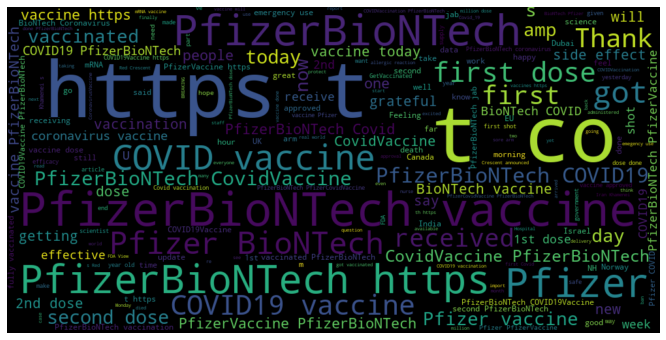

In [49]:
tweet_df = pfizy_df
words = ' '.join([word for word in tweet_df['text']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

In [50]:
def flatten_list(l):
    return [x for y in l for x in y]

def is_acceptable(word: str):
    return word not in stop_words and len(word) > 2

# Color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

# Reusable function to generate word clouds 
def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))
    
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")

    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
#     plt.show();
    return fig

def get_top_percent_words(doc, percent):
    # Returns a list of "top-n" most frequent words in a list 
    top_n = int(percent * len(set(doc)))
    counter = Counter(doc).most_common(top_n)
    top_n_words = [x[0] for x in counter]
    # print(top_n_words)
    return top_n_words
    
def clean_document(doc):
    spell = SpellChecker()
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize words (needed for calculating frequencies correctly )
    doc = [lemmatizer.lemmatize(x) for x in doc]
    
    # Get the top 10% of all words. This may include "misspelled" words 
    top_n_words = get_top_percent_words(doc, 0.1)

    # Get a list of misspelled words 
    misspelled = spell.unknown(doc)
    
    # Accept the correctly spelled words and top_n words 
    clean_words = [x for x in doc if x not in misspelled or x in top_n_words]
    
    # Try to split the misspelled words to generate good words (ex. "lifeisstrange" -> ["life", "is", "strange"])
    words_to_split = [x for x in doc if x in misspelled and x not in top_n_words]
    split_words = flatten_list([wordninja.split(x) for x in words_to_split])
    
    # Some splits may be nonsensical, so reject them ("llouis" -> ['ll', 'ou', "is"])
    clean_words.extend(spell.known(split_words))
    
    return clean_words

def get_log_likelihood(doc1, doc2):    
    doc1_counts = Counter(doc1)
    doc1_freq = {
        x: doc1_counts[x]/len(doc1)
        for x in doc1_counts
    }
    
    doc2_counts = Counter(doc2)
    doc2_freq = {
        x: doc2_counts[x]/len(doc2)
        for x in doc2_counts
    }
    
    doc_ratios = {
        # 1 is added to prevent division by 0
        x: math.log((doc1_freq[x] +1 )/(doc2_freq[x]+1))
        for x in doc1_freq if x in doc2_freq
    }
    
    top_ratios = Counter(doc_ratios).most_common()
    top_percent = int(0.1 * len(top_ratios))
    return top_ratios[:top_percent]

# Function to generate a document based on likelihood values for words 
def get_scaled_list(log_list):
    counts = [int(x[1]*100000) for x in log_list]
    words = [x[0] for x in log_list]
    cloud = []
    for i, word in enumerate(words):
        cloud.extend([word]*counts[i])
    # Shuffle to make it more "real"
    random.shuffle(cloud)
    return cloud

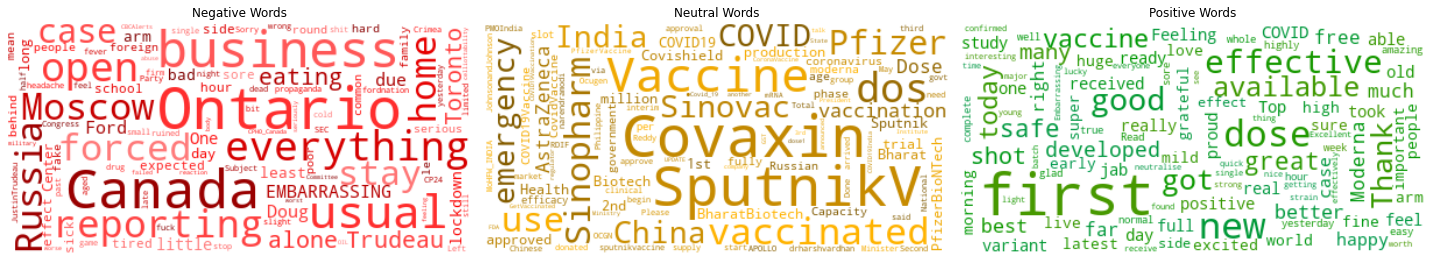

In [51]:
def get_smart_clouds(df):

    neg_doc = flatten_list(df[df['sentiment']=='negative']['words'])
    neg_doc = [x for x in neg_doc if is_acceptable(x)]

    pos_doc = flatten_list(df[df['sentiment']=='positive']['words'])
    pos_doc = [x for x in pos_doc if is_acceptable(x)]

    neu_doc = flatten_list(df[df['sentiment']=='neutral']['words'])
    neu_doc = [x for x in neu_doc if is_acceptable(x)]

    # Clean all the documents
    neg_doc_clean = clean_document(neg_doc)
    neu_doc_clean = clean_document(neu_doc)
    pos_doc_clean = clean_document(pos_doc)

    # Combine classes B and C to compare against A (ex. "positive" vs "non-positive")
    top_neg_words = get_log_likelihood(neg_doc_clean, flatten_list([pos_doc_clean, neu_doc_clean]))
    top_neu_words = get_log_likelihood(neu_doc_clean, flatten_list([pos_doc_clean, neg_doc_clean]))
    top_pos_words = get_log_likelihood(pos_doc_clean, flatten_list([neu_doc_clean, neg_doc_clean]))

    # Generate syntetic a corpus using our loglikelihood values 
    neg_doc_final = get_scaled_list(top_neg_words)
    neu_doc_final = get_scaled_list(top_neu_words)
    pos_doc_final = get_scaled_list(top_pos_words)

    # Visualise our synthetic corpus
    fig = generate_word_clouds(neg_doc_final, neu_doc_final, pos_doc_final)
    return fig

# Convert string to a list of words
wordcloud_df = df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("sentiment_wordclouds.png", bbox_inches="tight")

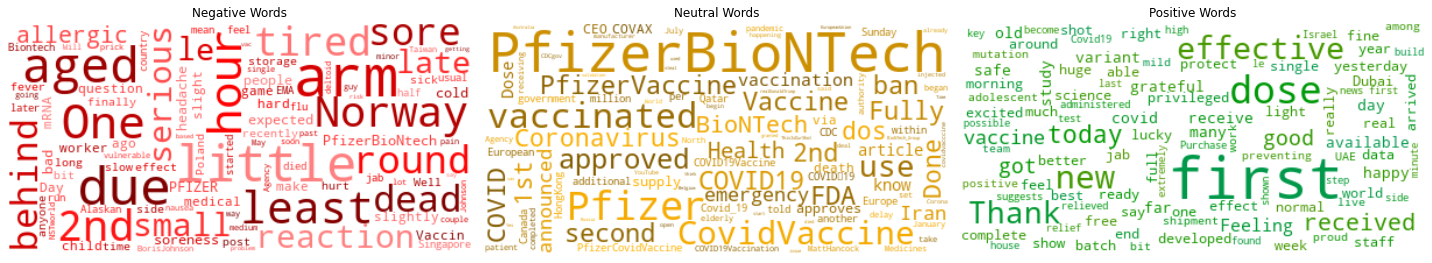

In [52]:
wordcloud_df = pfizy_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("pfizy_sentiment_wordclouds.png", bbox_inches="tight")

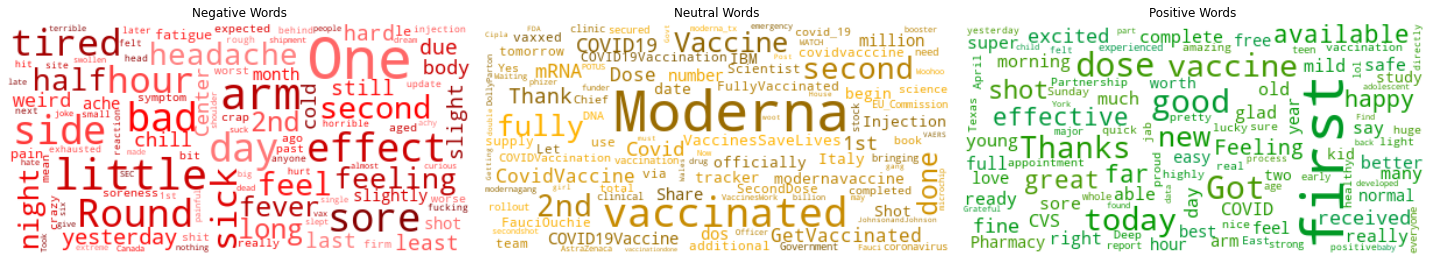

In [53]:
wordcloud_df = moderna_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("moderna_sentiment_wordclouds.png", bbox_inches="tight")

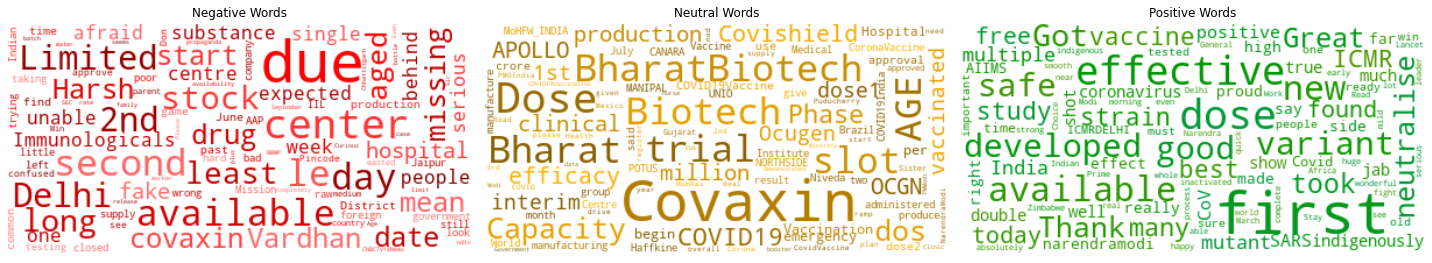

In [54]:
wordcloud_df = covaxin_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("covaxin_sentiment_wordclouds.png", bbox_inches="tight")